In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization,Flatten,Input,Add,Activation
from keras.utils import to_categorical
from keras.initializers import glorot_uniform
from PIL import Image

Using TensorFlow backend.


In [2]:
data=[]
labels=[]
classes=43
c_path='Traffic_Sign'

for i in range(classes):
    path=os.path.join(c_path,'train',str(i))
    images=os.listdir(path)
    
    for a in images:
        try:
            image=Image.open(path+'\\'+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading Image!!")
            
data=np.array(data)
labels=np.array(labels)

In [3]:
data.shape

(39209, 30, 30, 3)

In [4]:
data

array([[[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 85,  86,  84],
         ...,
         [ 68,  75,  74],
         [ 65,  69,  68],
         [ 66,  67,  66]],

        [[ 83,  84,  86],
         [ 80,  80,  82],
         [ 88,  88,  83],
         ...,
         [ 73,  77,  78],
         [ 76,  78,  75],
         [ 80,  80,  78]],

        [[ 78,  78,  80],
         [ 86,  85,  86],
         [ 90,  89,  90],
         ...,
         [ 71,  74,  71],
         [ 73,  74,  69],
         [ 78,  78,  74]],

        ...,

        [[133, 134, 139],
         [123, 127, 132],
         [112, 121, 125],
         ...,
         [ 94,  95,  89],
         [ 97,  98,  91],
         [ 99, 103,  99]],

        [[ 91,  95,  99],
         [ 91,  98, 103],
         [ 75,  86,  90],
         ...,
         [104, 102,  96],
         [110, 113, 104],
         [ 96, 104,  98]],

        [[ 85,  84,  87],
         [ 95, 101, 107],
         [ 63,  76,  81],
         ...,
         [103, 103,  95],
        

In [5]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [6]:
labels.shape

(39209,)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(data,labels,test_size=0.2,random_state=5)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(31367, 30, 30, 3) (31367,)
(7842, 30, 30, 3) (7842,)


In [8]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)

In [9]:
def model(input_shape=(30,30,3),classes=43):
    X_input = Input(input_shape)
    
    X = Conv2D(filters=32, kernel_size= (5,5), strides=1, padding='same',name = 'CONV-Layer-1', kernel_initializer=glorot_uniform(seed = 0))(X_input)
    X = Conv2D(32, kernel_size=(5,5), strides=1, padding = 'valid', name = 'CONV-Layer-2', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = 'BatchN-Layer-1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid', name = 'Padding-Layer-1')(X)
    
    X = Dropout(0.25)(X)
    
    X = Conv2D(64, kernel_size=(5,5), strides=1, padding = 'valid', name = 'CONV-Layer-3', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = Conv2D(64, kernel_size=(5,5), strides=1, padding = 'valid', name = 'CONV-Layer-4', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')(X)
    
    X = Flatten()(X)
    X = Dense(256, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = Dropout(0.5)(X)
    X = Dense(128, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = Dropout(0.5)(X)
    X = BatchNormalization()(X)
    X = Dense(64, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization()(X)
    X = Dense(classes, activation = 'softmax', kernel_initializer=glorot_uniform(seed = 0))(X)
   
    model = Model(inputs = X_input, outputs = X, name = "Net - Partial")
    
    return model

In [10]:
model=model()

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "Net - Partial"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30, 30, 3)         0         
_________________________________________________________________
CONV-Layer-1 (Conv2D)        (None, 30, 30, 32)        2432      
_________________________________________________________________
CONV-Layer-2 (Conv2D)        (None, 26, 26, 32)        25632     
_________________________________________________________________
BatchN-Layer-1 (BatchNormali (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
Padding-Layer-1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)      

In [13]:
epochs=25
hist=model.fit(x_train,y_train,batch_size=64,epochs=epochs,validation_data=(x_val,y_val))

Train on 31367 samples, validate on 7842 samples
Epoch 1/25
31367/31367 [==============================] - 70s 2ms/step - loss: 2.3936 - accuracy: 0.3696 - val_loss: 0.8083 - val_accuracy: 0.7614
Epoch 2/25
31367/31367 [==============================] - 71s 2ms/step - loss: 0.7801 - accuracy: 0.7724 - val_loss: 0.2768 - val_accuracy: 0.9300
Epoch 3/25
31367/31367 [==============================] - 69s 2ms/step - loss: 0.4683 - accuracy: 0.8590 - val_loss: 0.1290 - val_accuracy: 0.9714
Epoch 4/25
31367/31367 [==============================] - 72s 2ms/step - loss: 0.3178 - accuracy: 0.9058 - val_loss: 0.1019 - val_accuracy: 0.9744
Epoch 5/25
31367/31367 [==============================] - 74s 2ms/step - loss: 0.2351 - accuracy: 0.9297 - val_loss: 0.0878 - val_accuracy: 0.9739
Epoch 6/25
31367/31367 [==============================] - 75s 2ms/step - loss: 0.2346 - accuracy: 0.9316 - val_loss: 0.0696 - val_accuracy: 0.9834
Epoch 7/25
31367/31367 [==============================] - 70s 2ms/ste

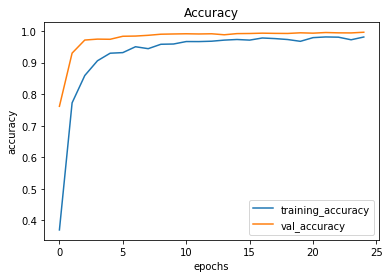

In [14]:
plt.figure(0)
plt.plot(hist.history['accuracy'],label='training_accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

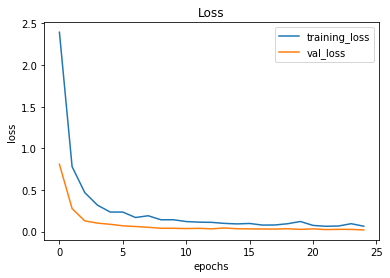

In [15]:
plt.figure(1)
plt.plot(hist.history['loss'],label='training_loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [16]:
y_test=pd.read_csv('Traffic_Sign/test.csv')
y_test.head

<bound method NDFrame.head of        Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0         53      54       6       5      48      49       16  Test/00000.png
1         42      45       5       5      36      40        1  Test/00001.png
2         48      52       6       6      43      47       38  Test/00002.png
3         27      29       5       5      22      24       33  Test/00003.png
4         60      57       5       5      55      52       11  Test/00004.png
...      ...     ...     ...     ...     ...     ...      ...             ...
12625     42      41       5       6      37      36       12  Test/12625.png
12626     50      51       6       5      45      46       33  Test/12626.png
12627     29      29       6       6      24      24        6  Test/12627.png
12628     48      49       5       6      43      44        7  Test/12628.png
12629     32      31       6       5      27      26       10  Test/12629.png

[12630 rows x 8 columns]>

In [17]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values


In [18]:
labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [19]:
imgs

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype=object)

In [20]:
data=[]
for img in imgs:
    image=Image.open(img)
    image=image.resize((30,30))
    data.append(np.array(img))
data

[array('Test/00000.png', dtype='<U14'),
 array('Test/00001.png', dtype='<U14'),
 array('Test/00002.png', dtype='<U14'),
 array('Test/00003.png', dtype='<U14'),
 array('Test/00004.png', dtype='<U14'),
 array('Test/00005.png', dtype='<U14'),
 array('Test/00006.png', dtype='<U14'),
 array('Test/00007.png', dtype='<U14'),
 array('Test/00008.png', dtype='<U14'),
 array('Test/00009.png', dtype='<U14'),
 array('Test/00010.png', dtype='<U14'),
 array('Test/00011.png', dtype='<U14'),
 array('Test/00012.png', dtype='<U14'),
 array('Test/00013.png', dtype='<U14'),
 array('Test/00014.png', dtype='<U14'),
 array('Test/00015.png', dtype='<U14'),
 array('Test/00016.png', dtype='<U14'),
 array('Test/00017.png', dtype='<U14'),
 array('Test/00018.png', dtype='<U14'),
 array('Test/00019.png', dtype='<U14'),
 array('Test/00020.png', dtype='<U14'),
 array('Test/00021.png', dtype='<U14'),
 array('Test/00022.png', dtype='<U14'),
 array('Test/00023.png', dtype='<U14'),
 array('Test/00024.png', dtype='<U14'),


In [21]:
x_test=np.array(data)

In [22]:
x_test.shape

(12630,)

In [23]:
x_test

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype='<U14')

In [24]:
x_test

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype='<U14')

In [25]:
path=os.path.join(c_path,'Test')
images=os.listdir(path)
data=[]
for a in images:
    try:
        image=Image.open(path+'\\'+a)
        image=image.resize((30,30))
        image=np.array(image)
        data.append(image)
    except:
        print("Error loading Image!!")
            
x_test=np.array(data)

Error loading Image!!


In [26]:
x_test.shape

(12630, 30, 30, 3)

In [27]:
labels.shape

(12630,)

In [28]:
y_test=to_categorical(labels)

In [29]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred=np.argmax(y_pred,axis=1)

In [32]:
y_pred

array([16,  1, 38, ...,  1,  7, 10], dtype=int64)

In [33]:
labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,labels)*100
print(acc)

96.83293745051465


In [35]:
model.save("traffic_classifier.h5")